In [2]:
from textblob import TextBlob

In [3]:
review = 'Camera quality is not very good'
review1 = 'camera have excellent features'

In [4]:
analysis = TextBlob(review1) 

In [5]:
analysis.polarity

1.0

In [6]:
import re 
import tweepy 
from tweepy import OAuthHandler  # twitter app authentication
from textblob import TextBlob 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
# Get the below strings/api codes from developer.twitter.com
# Step 1: Login to twitter and visit the developer site
# Step 2 : Navigate to "Create a new App"
# Step 3 : fill the details accordingly
# Step 4 : api keys are now generated
# keys and tokens from the Twitter Dev Console 
consumer_key = 'VJFZEdGk7cyzbbKVPaPaAIPgs'
consumer_secret = 'WcA3PZ0ZYNuad524X3qUx97ExiEmI0gULZ3JcMMwmxn920xxC7'
access_token = '3257684406-kh5gJuLncLMe9o1kQVKS60FH47XmITXMUgo4qmB'
access_token_secret = 'BPg3GA7pSj86qvFqzmCXPCBGQeaSuPXRKdkP2UC1W85A1'

In [8]:
# attempt authentication 

# create OAuthHandler object 
auth = OAuthHandler(consumer_key, consumer_secret) 
    
# set access token and secret 
auth.set_access_token(access_token, access_token_secret) 
    
# create tweepy API object to fetch tweets 
api = tweepy.API(auth,wait_on_rate_limit=True) 

In [9]:
# 1. removing @username
# 2. tabs 
# 3. non words and other spaces
def clean_tweet(tweet): 
    ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet).split()) 


In [10]:
# Using text blob from above, we calculate the polarity score
# textblob has a corpus of positive, negative and neutral words
# It checks for the presence of these words in the document and calculates the overall
# polarity

def get_tweet_sentiment(tweet): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(clean_tweet(tweet)) 
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [28]:
# empty list to store parsed tweets 
tweets = [] 

# call twitter api to fetch tweets 
# count = 20
# The number of tweets to return per page, up to a maximum of 100. 
# Defaults to 15.
# This restriction is due to a security update from the Twitter API
# We will get rid of this limitation using the new 
# tweepy.Cursor() method

#fetched_tweets = api.search(q = "chidambaram", count = 100)
fetched_tweets=tweepy.Cursor(api.search,q="sehwag").items(40)

# parsing tweets one by one 
for tweet in fetched_tweets: 
    # empty dictionary to store required params of a tweet 
    parsed_tweet = {} 

    # saving text of tweet 
    parsed_tweet['text'] = tweet.text

    
    # saving sentiment of tweet 
    parsed_tweet['sentiment'] = get_tweet_sentiment(tweet=clean_tweet(tweet.text)) 

    # appending parsed tweet to tweets list 
    if tweet.retweet_count > 0: 
        # if tweet has retweets, ensure that it is appended only once 
        if parsed_tweet not in tweets: 
            tweets.append(parsed_tweet) 
    else: 
        tweets.append(parsed_tweet) 

In [29]:
len(tweets)

27

In [30]:
tweets[5:15]

[{'text': 'RT @coolfunnytshirt: This was probably the best moment of the day when Sachin, Sehwag and Lara ran into Rishabh Pant to hug him after the w…',
  'sentiment': 'positive'},
 {'text': '@RishabhPant17 Great Show Rishabh bhai...proud of you.. its tough to fill the shoes of sehwag ji, but you are on course to fill the same..',
  'sentiment': 'positive'},
 {'text': 'RT @ruchirsharma_1: Can confirm. In fact, this magic works with all Delhi Ranji cricketers.\n\nBack in the early 2000s, I met @Amitbhandari11…',
  'sentiment': 'positive'},
 {'text': 'ऑस्ट्रेलिया में जीत के बाद सहवाग ने किया मजेदार ट्वीट, बोले आज से ब्रिस्बेन का नाम.... \n\n#RishabhPant… https://t.co/xLKgWnqicC',
  'sentiment': 'neutral'},
 {'text': 'लैंगर बोले- भारत को कम आंकने की भूल कभी नहीं करेंगे, वीरू ने दिया टका सा जवाब https://t.co/6GWsJWv9ld',
  'sentiment': 'neutral'},
 {'text': '1. India has unearthed a gem of an opener with @RealShubmanGill. It might even be that he is more suited for middle… https://t.co/i4

In [31]:
# picking positive tweets from tweets 
ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
# percentage of positive tweets 
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets))) 

Positive tweets percentage: 44.44444444444444 %


In [32]:
# picking negative tweets from tweets 
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
# percentage of negative tweets 
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets))) 

Negative tweets percentage: 3.7037037037037037 %


In [33]:
# percentage of neutral tweets 
print("Neutral tweets percentage: {} %".format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets))) 

Neutral tweets percentage: 51.851851851851855 %


In [34]:
df_tweets_cnt = pd.DataFrame(pd.concat([pd.Series(len(ptweets)), pd.Series(len(ntweets)), pd.Series( (len(tweets) - len(ntweets) - len(ptweets))) ],axis=0 ))
df_tweets_cnt.set_index(pd.Series(['ptweets', 'ntweets', 'nuetral_tweets']), inplace=True)
print(df_tweets_cnt)

                 0
ptweets         12
ntweets          1
nuetral_tweets  14


In [18]:
# printing first 10 positive tweets 
print("\n\nPositive tweets:") 
for tweet in ptweets[:10]: 
    print(clean_tweet(tweet['text'])) 



Positive tweets:
After the excellent gain of yesterday the market extended the rally and now very close to the magical 50000 levels
Sensex up 39383 points to end at lifetime high of 4979212 Nifty up 12355 points to ckose at record 1464470
Breaking News BSE Sensex jumps 39383 pts to end at lifetime high of 4979212 bring it closer to the key psych
RT News BSE Sensex jumps 39383 pts to end at lifetime high of 4979212 NSE Nifty soars 12355 pts to record 1464470
RT Sensex ends at record high of 49792
Sensex ends at record high of 49792 Nifty at 14645
BSE Sensex jumps 39383 pts to end at lifetime high of 4979212 NSE Nifty soars 12355 pts to record 1464470
Markets BSE Sensex jumps 39383 pts to end at lifetime high of 4979212 NSE Nifty soars 12355 pts to record 1464470PTI
Sensex surges 394 points to hit fresh closing high Nifty ends near 14650
BSE Sensex jumps 39383 pts to end at lifetime high of 4979212 NSE Nifty soars 12355 pts to record 1464470


In [19]:
# printing first 10 negative tweets 
print("\n\nNegative tweets:") 
for tweet in ntweets[:10]: 
    print(tweet['text']) 



Negative tweets:
Bullish

Sensex will hit 50000 because of this. I pity you, if you are sitting on cash. https://t.co/1WJsooM0eN


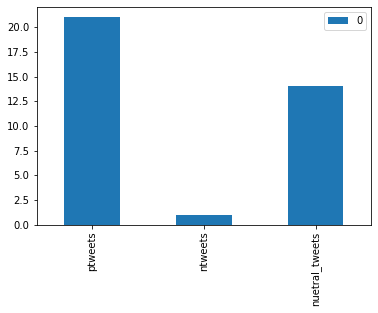

In [20]:
df_tweets_cnt.plot(kind='bar')